<a href="https://colab.research.google.com/github/caaledcarre/C3-G26-COLOR/blob/main/Equipo2_Detector_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de Datos (EDA)

### Importación de Dependencias y dataset

In [ ]:
!pip install opencv-python
!pip install Pillow

In [ ]:
# Importamos dependencias
import cv2
import numpy as np
import pandas as pd
import os
import random
import seaborn as sns

import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

from skimage.feature import hog
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#Evaluacion del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns

#Modelo de Regresion Lineal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Modelo Maquina de soporte
from sklearn.svm import SVC

### Carga de datos

In [ ]:
!pip install -q kaggle
from google.colab import files

# Descarga el dataset de fire-dataset de Kaggle
!kaggle datasets download -d phylake1337/fire-dataset

# Descomprime el archivo zip
!unzip fire-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
 98% 379M/387M [00:04<00:00, 107MB/s] 
100% 387M/387M [00:04<00:00, 89.1MB/s]
Archive:  fire-dataset.zip
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_images/fire.109.png  
  inflating: fire_dataset/fire_images/fire.11.png  
  inflating: fire_dataset/fire_images/fire.110.png  
  inflating: fire_dataset/fire_images/fire.111.png  
  inflating: f

### Distribución de los datos


In [ ]:
# Directorio que contiene las imágenes etiquetadas de incendios
data_dir_fire = "/content/fire_dataset/fire_images"

# Directorio que contiene las imágenes etiquetadas de no-incendios
data_dir_non_fire = "/content/fire_dataset/non_fire_images"

In [ ]:
# Lista de archivos correspondientes a incendios
fire_images = os.listdir(data_dir_fire)

# Lista de archivos correspondientes a no-incendios
non_fire_images = os.listdir(data_dir_non_fire)

# Imprimir el total de imágenes en cada categoría
print(f"Total de imágenes etiquetadas como incendios: {len(fire_images)}")
print(f"Total de imágenes etiquetadas como no-incendios: {len(non_fire_images)}")

Total de imágenes etiquetadas como incendios: 755
Total de imágenes etiquetadas como no-incendios: 244


### Dimensiones de las imágenes

In [ ]:
def obtener_dimensiones_imagenes(data_dir):

    image_dimensions = []
    image_files = os.listdir(data_dir)
    for filename in image_files:
        # Ruta completa de la imagen
        img_path = os.path.join(data_dir, filename)

        # Leer la imagen utilizando OpenCV
        try:
          img = cv2.imread(img_path)
          #img = Image.open(img_path)
        except Exception as e:
          # If OpenCV fails to read the image, use PIL
          print(f"Error al leer la imagen {img_path}: {e}")
          continue

        if img is None:
            print(f"Error al leer la imagen {img_path}")
            continue

        # Obtener las dimensiones de la imagen (altura x ancho)
        height, width, _ = img.shape

        # Guardar las dimensiones en una lista
        image_dimensions.append((height, width))

    return image_dimensions

In [ ]:
def mostrar_dimensiones_imagenes(image_dimensions):
    print("Dimensiones de las imágenes:")
    for i, (height, width) in enumerate(image_dimensions, start=1):
        print(f"Imagen {i}: Altura = {height}, Ancho = {width}")


In [ ]:
# Uso de las funciones
dimensiones_fire = obtener_dimensiones_imagenes(data_dir_fire)
dimensiones_non_fire = obtener_dimensiones_imagenes(data_dir_non_fire)

mostrar_dimensiones_imagenes(dimensiones_fire)
mostrar_dimensiones_imagenes(dimensiones_non_fire)

Error al leer la imagen /content/fire_dataset/non_fire_images/non_fire.189.png
Dimensiones de las imágenes:
Imagen 1: Altura = 513, Ancho = 800
Imagen 2: Altura = 405, Ancho = 720
Imagen 3: Altura = 843, Ancho = 1500
Imagen 4: Altura = 1152, Ancho = 2048
Imagen 5: Altura = 392, Ancho = 696
Imagen 6: Altura = 405, Ancho = 780
Imagen 7: Altura = 582, Ancho = 970
Imagen 8: Altura = 800, Ancho = 1200
Imagen 9: Altura = 1242, Ancho = 2048
Imagen 10: Altura = 682, Ancho = 970
Imagen 11: Altura = 675, Ancho = 900
Imagen 12: Altura = 338, Ancho = 600
Imagen 13: Altura = 360, Ancho = 640
Imagen 14: Altura = 405, Ancho = 720
Imagen 15: Altura = 450, Ancho = 700
Imagen 16: Altura = 414, Ancho = 992
Imagen 17: Altura = 173, Ancho = 307
Imagen 18: Altura = 282, Ancho = 500
Imagen 19: Altura = 439, Ancho = 780
Imagen 20: Altura = 333, Ancho = 500
Imagen 21: Altura = 788, Ancho = 1400
Imagen 22: Altura = 282, Ancho = 500
Imagen 23: Altura = 413, Ancho = 620
Imagen 24: Altura = 533, Ancho = 800
Imagen

### Etiquetado


In [ ]:
# Crear etiquetas para las imágenes de incendios (1) y no-incendios (0)
labels_fire = [1] * len(fire_images)
labels_non_fire = [0] * len(non_fire_images)

# Combinar las listas de archivos y las etiquetas
all_images = fire_images + non_fire_images
all_labels = labels_fire + labels_non_fire


In [ ]:
# Crear rutas completas para todas las imágenes
all_image_paths = [os.path.join(data_dir_fire, img) for img in fire_images] + [os.path.join(data_dir_non_fire, img) for img in non_fire_images]

# Crear un DataFrame de pandas
df = pd.DataFrame({
    'image_path': all_image_paths,
    'label': all_labels
})

# Mezclar el DataFrame para asegurarse de que no esté ordenado
df = shuffle(df).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame
print(df.head())

                                          image_path  label
0     /content/fire_dataset/fire_images/fire.546.png      1
1     /content/fire_dataset/fire_images/fire.310.png      1
2      /content/fire_dataset/fire_images/fire.48.png      1
3     /content/fire_dataset/fire_images/fire.185.png      1
4  /content/fire_dataset/non_fire_images/non_fire...      0


### Visualización de algunas imágenes

<Figure size 1500x1000 with 0 Axes>

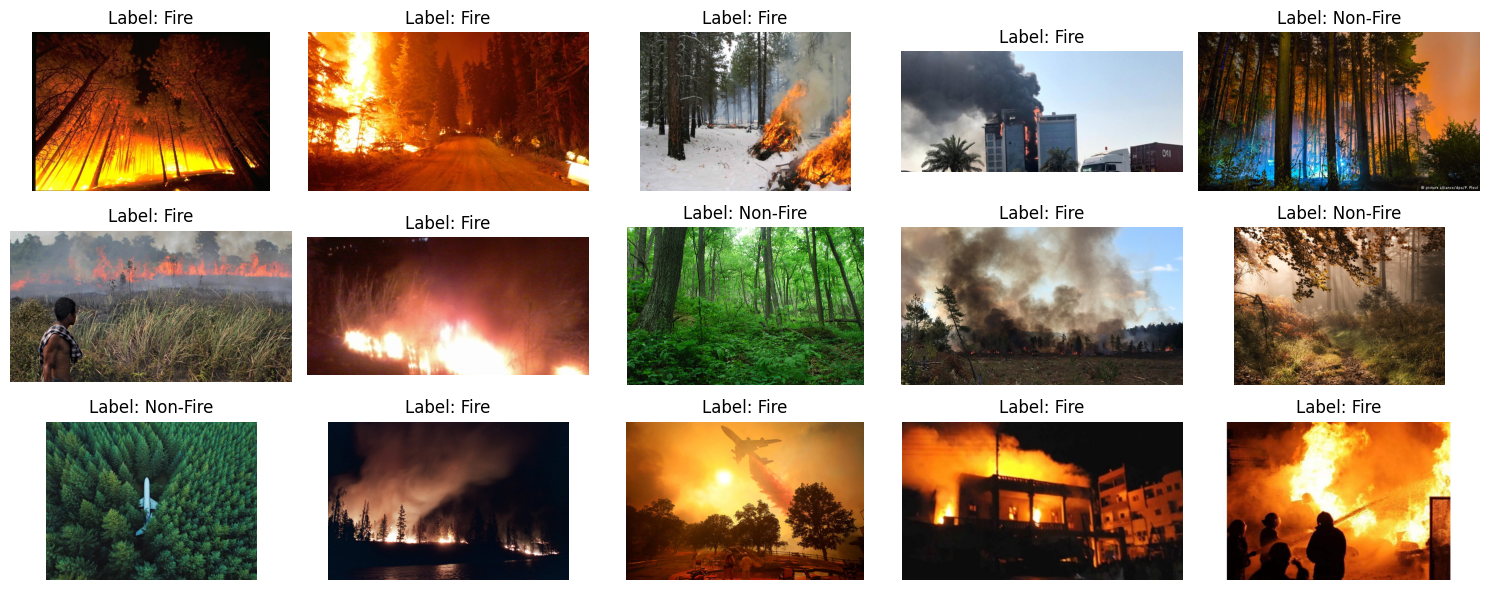

In [ ]:
def display_images_from_dataframe(df, num_images=5):
    plt.figure(figsize=(15, 10))
    fig, axes = plt.subplots(3, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        img_path = df.iloc[i]['image_path']
        img_label = df.iloc[i]['label']
        img = Image.open(img_path)

        plt.subplot(3, 5, i + 1)
        plt.imshow(img)
        plt.title(f'Label: {"Fire" if img_label == 1 else "Non-Fire"}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualizar algunas imágenes del DataFrame
display_images_from_dataframe(df)

### Valores atípicos

Al inspeccionar manualmente el conjunto de imágenes sin incendios, encontramos un etiquetado erróneo, ya que dicho archivo en realidad retrataba un incendio. así que re-etiquetamos y movemos la imagen etiquetada de manera errónea.

También eliminamos el archivo non_fire.133.png porque presenta problemas

In [ ]:
# Eliminamos non_fire.133
def delete_image(image_path, df):
    try:
        os.remove(image_path)
        print(f"Imagen eliminada: {image_path}")
        # Eliminar la fila correspondiente del DataFrame
        df = df[df['image_path'] != image_path].reset_index(drop=True)
    except Exception as e:
        print(f"No se pudo eliminar la imagen: {image_path}. Error: {e}")
    return df

# Ejemplo de uso para eliminar una imagen específica
image_to_delete = "/content/fire_dataset/non_fire_images/non_fire.189.png"
df = delete_image(image_to_delete, df)

Imagen eliminada: /content/fire_dataset/non_fire_images/non_fire.189.png


Cambiamos el nombre de la imagen y la movemos de la carpeta fire a non_fire

In [ ]:
# Función que renombra una imagen
def rename_image(original_path, new_name):
    # Obtener el directorio de la imagen original
    directory = os.path.dirname(original_path)

    # Crear la nueva ruta completa
    new_path = os.path.join(directory, new_name)

    try:
        os.rename(original_path, new_path)
        print(f"Imagen renombrada de {original_path} a {new_path}")
    except Exception as e:
        print(f"No se pudo renombrar la imagen: {original_path}. Error: {e}")

# Ejemplo de uso para renombrar una imagen específica
original_image_path = "/content/fire_dataset/non_fire_images/non_fire.133.png"
new_image_name = "fire.756"

rename_image(original_image_path, new_image_name)

Imagen renombrada de /content/fire_dataset/non_fire_images/non_fire.133.png a /content/fire_dataset/non_fire_images/fire.756


In [ ]:
# Funcion que cambia un archivo de un directorio a otro
import shutil

def move_image(src_path, dest_path):
    try:
        shutil.move(src_path, dest_path)
        print(f"Imagen movida de {src_path} a {dest_path}")
    except Exception as e:
        print(f"No se pudo mover la imagen de {src_path} a {dest_path}. Error: {e}")

# Ejemplo de uso para mover una imagen específica
image_to_move = "/content/fire_dataset/non_fire_images/fire.756"
destination_dir = "/content/fire_dataset/fire_images/"

# Crear la ruta completa de destino
destination_path = os.path.join(destination_dir, os.path.basename(image_to_move))
move_image(image_to_move, destination_path)

Imagen movida de /content/fire_dataset/non_fire_images/fire.756 a /content/fire_dataset/fire_images/fire.756


### Imágenes por clase

<ipython-input-15-6d50e61abb50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "label", data = df, palette=colors)


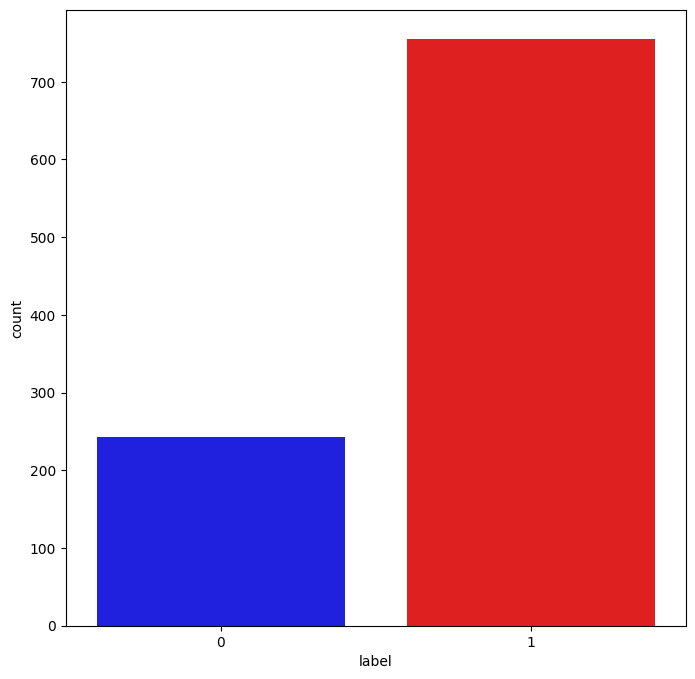

In [ ]:
# Gráfica que muestra el número de etiquetas
colors = ["blue", "red"]
plt.figure(figsize = (8,8))
sns.countplot(x = "label", data = df, palette=colors)
plt.show()

In [ ]:
df.shape

(998, 2)

## Histograma de colores

Un histograma de colores es una representación de la distribución de los colores en una imagen

In [ ]:
# Visualización de histogramas de colores promedio
def visualizar_histogramas_promedio(imagenes, titulo):
    colores = ('b', 'g', 'r')
    # Inicializar histogramas acumulativos
    hist_acumulado = {color: np.zeros((256, 1)) for color in colores}

    for imagen in imagenes:
        for i, color in enumerate(colores):
            hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
            hist_acumulado[color] += hist

    # Promediar los histogramas
    num_imagenes = len(imagenes)
    for color in colores:
        hist_acumulado[color] /= num_imagenes

    # Graficar los histogramas promedios
    for color in colores:
        plt.plot(hist_acumulado[color], color=color)
        plt.xlim([0, 256])

    plt.title(titulo)
    plt.show()

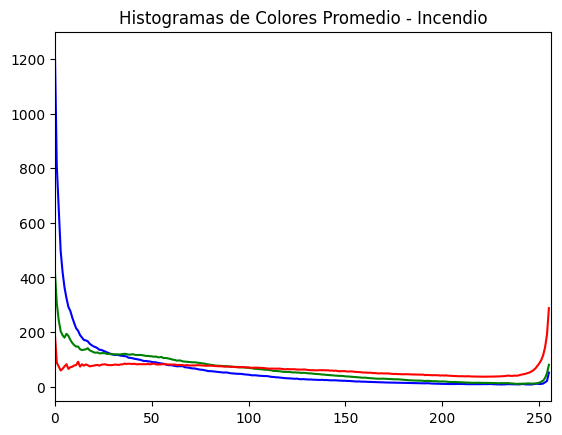

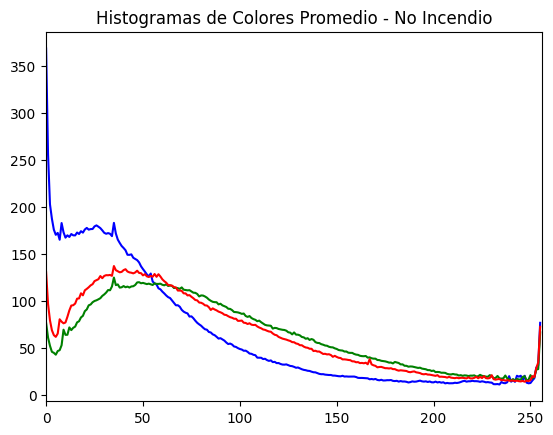

In [ ]:
# Cargar imágenes en color para el análisis del histograma de colores
def cargar_imagenes_color(carpeta):
    imagenes = []

    for filename in os.listdir(carpeta):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            filepath = os.path.join(carpeta, filename)

             # Comprueba si el archivo existe y es legible
            if os.path.isfile(filepath) and os.access(filepath, os.R_OK):
                imagen = cv2.imread(filepath)

                # Comprueba si la imagen se ha cargado correctamente
                if imagen is not None:
                  imagen = cv2.resize(imagen, (128, 128))
                  imagenes.append(imagen)

                else:
                    print(f"Error al cargen una imagen: {filepath}")
            else:
                print(f"Archivo no encontrado o inaccesible: {filepath}")

    return np.array(imagenes)

# Creacion de los histogramas de colores
carpeta_incendio = "/content/fire_dataset/fire_images"
carpeta_no_incendio = "/content/fire_dataset/non_fire_images"

imagenes_color_incendio = cargar_imagenes_color(carpeta_incendio)
imagenes_color_no_incendio = cargar_imagenes_color(carpeta_no_incendio)

visualizar_histogramas_promedio(imagenes_color_incendio, 'Histogramas de Colores Promedio - Incendio')
visualizar_histogramas_promedio(imagenes_color_no_incendio, 'Histogramas de Colores Promedio - No Incendio')

### Extracción de caracteristicas HOG

Distingue características estructurales y texturales importantes que pueden distinguir las imágenes de incendios de las que no lo son.

In [ ]:
# Función para cargar imágenes y extraer características HOG
def cargar_imagenes_y_extraer_hog(carpeta):
    imagenes = []
    features_hog = []

    for filename in os.listdir(carpeta):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            filepath = os.path.join(carpeta, filename)
            try:
              imagen = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            except:
              print(f"Error al leer la imagen: {filepath}")
              continue

            if imagen is None:
              print(f"Imagen no encontrada: {filepath}")
              continue

            imagen = cv2.resize(imagen, (128, 128))
            hog_feature, hog_image = hog(imagen, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            imagenes.append(imagen)
            features_hog.append(hog_feature)

    return np.array(imagenes), np.array(features_hog)

In [ ]:
# Cargar y extraer características HOG
imagenes_incendio, hog_features_incendio = cargar_imagenes_y_extraer_hog(data_dir_fire)
imagenes_no_incendio, hog_features_no_incendio = cargar_imagenes_y_extraer_hog(data_dir_non_fire)

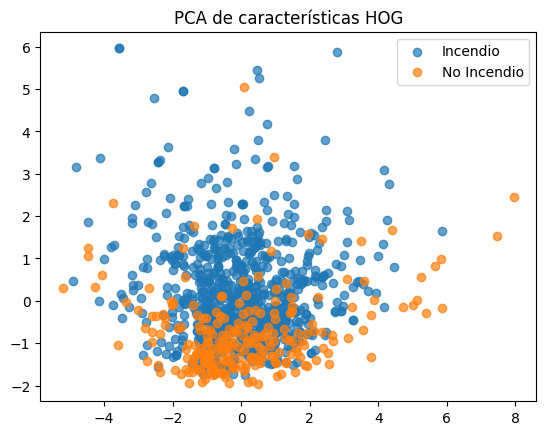

In [ ]:
# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
hog_features = np.vstack((hog_features_incendio, hog_features_no_incendio))
pca_features = pca.fit_transform(hog_features)

plt.scatter(pca_features[:len(hog_features_incendio), 0], pca_features[:len(hog_features_incendio), 1], label='Incendio', alpha=0.7)
plt.scatter(pca_features[len(hog_features_incendio):, 0], pca_features[len(hog_features_incendio):, 1], label='No Incendio', alpha=0.7)
plt.legend()
plt.title('PCA de características HOG')
plt.show()

 Podemos observar que las clases incendio y no incendio son distinguibles en la gráfica, lo cual significa que las características HOG capturan diferencias significativas entre las dos clases.

**-Gráfico de Dispersión:**

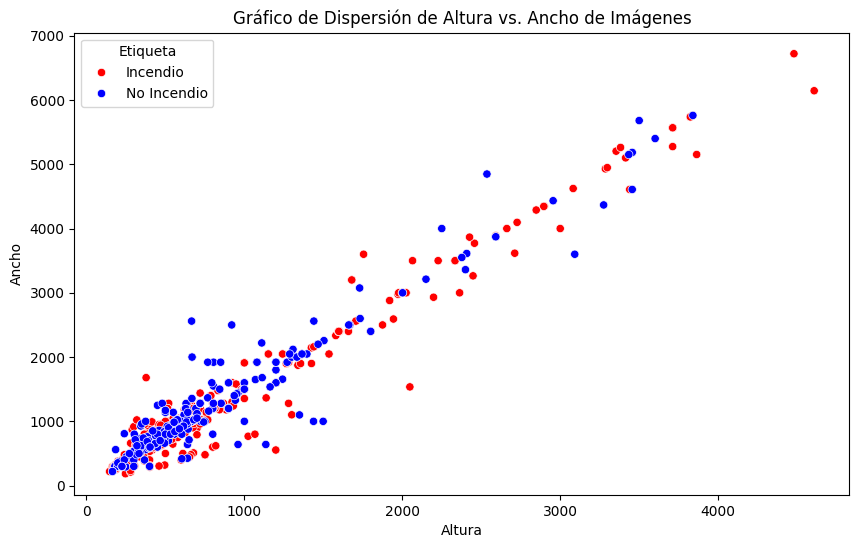

In [ ]:
# Función para obtener las dimensiones de las imágenes
def obtener_dimensiones(carpeta, etiqueta):
    dimensiones = []
    for filename in os.listdir(carpeta):
        img_path = os.path.join(carpeta, filename)
        img = cv2.imread(img_path)
        if img is not None:
            height, width, _ = img.shape
            dimensiones.append((height, width, etiqueta))
        else:
            print(f"Error al cargar la imagen: {filename}")
    return dimensiones

# Rutas a las carpetas de imágenes
carpeta_incendio = "/content/fire_dataset/fire_images"
carpeta_no_incendio = "/content/fire_dataset/non_fire_images"

# Obtener dimensiones de las imágenes
dimensiones_incendio = obtener_dimensiones(carpeta_incendio, 'Incendio')
dimensiones_no_incendio = obtener_dimensiones(carpeta_no_incendio, 'No Incendio')

# Combinar las dimensiones en una lista
dimensiones_total = dimensiones_incendio + dimensiones_no_incendio

# Crear un DataFrame
df_dimensiones = pd.DataFrame(dimensiones_total, columns=['Alto', 'Ancho', 'Etiqueta'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dimensiones, x='Alto', y='Ancho', hue='Etiqueta', palette={'Incendio': 'red', 'No Incendio': 'blue'})
plt.title('Gráfico de Dispersión de Altura vs. Ancho de Imágenes')
plt.xlabel('Altura')
plt.ylabel('Ancho')
plt.legend(title='Etiqueta')
plt.show()


**-Gráfico Boxplot (Cajas y bigotes):**

<ipython-input-23-f21dd37b45ad>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dimensiones, x='Etiqueta', y='Alto', ax=axes[0], palette=palette)
<ipython-input-23-f21dd37b45ad>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dimensiones, x='Etiqueta', y='Ancho', ax=axes[1], palette=palette)


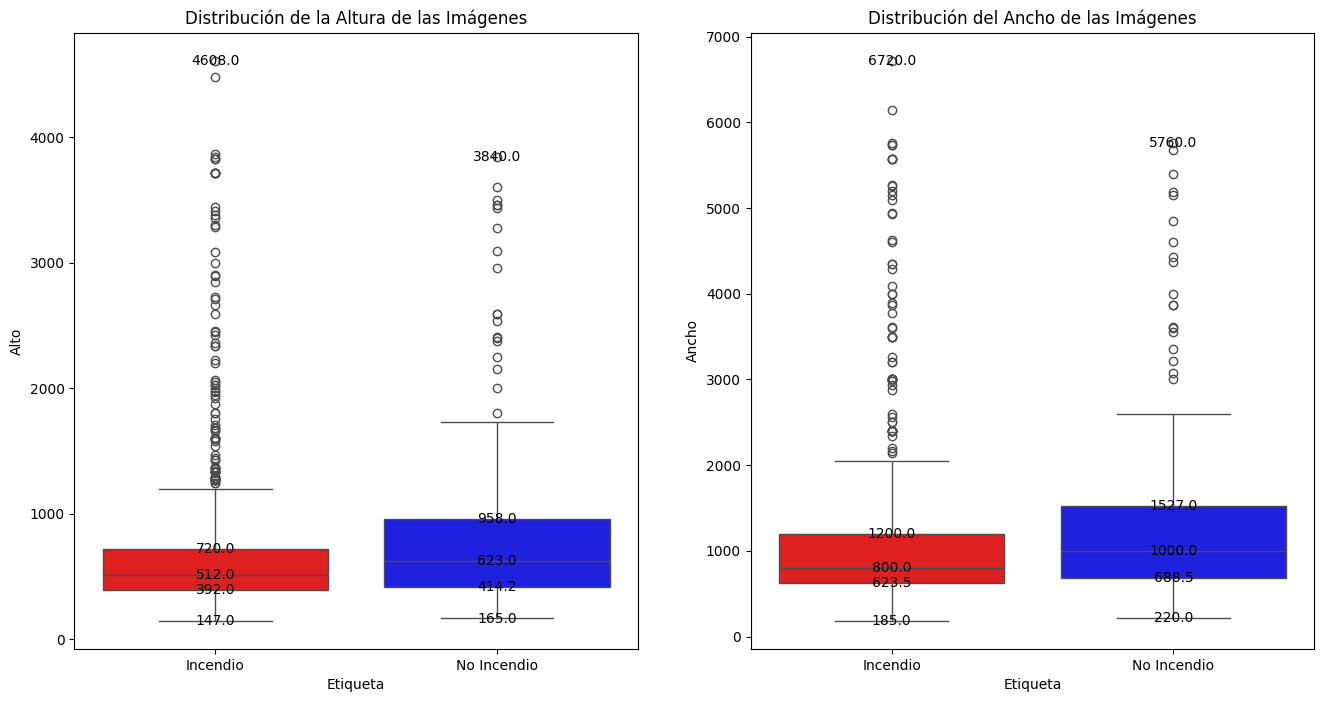

In [ ]:
# Función para obtener las dimensiones de las imágenes
def obtener_dimensiones(carpeta, etiqueta):
    dimensiones = []
    for filename in os.listdir(carpeta):
        img_path = os.path.join(carpeta, filename)
        img = cv2.imread(img_path)
        if img is not None:
            height, width, _ = img.shape
            dimensiones.append((height, width, etiqueta))
        else:
            print(f"Error al cargar la imagen: {filename}")
    return dimensiones

# Rutas a las carpetas de imágenes
carpeta_incendio = "/content/fire_dataset/fire_images"
carpeta_no_incendio = "/content/fire_dataset/non_fire_images"

# Obtener dimensiones de las imágenes
dimensiones_incendio = obtener_dimensiones(carpeta_incendio, 'Incendio')
dimensiones_no_incendio = obtener_dimensiones(carpeta_no_incendio, 'No Incendio')

# Combinar las dimensiones en una lista
dimensiones_total = dimensiones_incendio + dimensiones_no_incendio

# Crear un DataFrame
df_dimensiones = pd.DataFrame(dimensiones_total, columns=['Alto', 'Ancho', 'Etiqueta'])

# Función para agregar etiquetas a los boxplots
def agregar_etiquetas(ax, data, feature):
    stats = data.groupby('Etiqueta')[feature].describe()

    for xtick in ax.get_xticks():
        etiqueta = ax.get_xticklabels()[xtick].get_text()
        y_values = stats.loc[etiqueta]

        min_val = y_values['min']
        q1 = y_values['25%']
        median = y_values['50%']
        q3 = y_values['75%']
        max_val = y_values['max']

        ax.text(xtick, min_val, f'{min_val:.1f}', ha='center', va='center', color='black')
        ax.text(xtick, q1, f'{q1:.1f}', ha='center', va='center', color='black')
        ax.text(xtick, median, f'{median:.1f}', ha='center', va='center', color='black')
        ax.text(xtick, q3, f'{q3:.1f}', ha='center', va='center', color='black')
        ax.text(xtick, max_val, f'{max_val:.1f}', ha='center', va='center', color='black')

# Crear gráficos de caja y bigotes para 'Alto' y 'Ancho'
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Colores para las categorías
palette = {"Incendio": "red", "No Incendio": "blue"}

# Gráfico de caja y bigotes para 'Alto'
sns.boxplot(data=df_dimensiones, x='Etiqueta', y='Alto', ax=axes[0], palette=palette)
agregar_etiquetas(axes[0], df_dimensiones, 'Alto')
axes[0].set_title('Distribución de la Altura de las Imágenes')

# Gráfico de caja y bigotes para 'Ancho'
sns.boxplot(data=df_dimensiones, x='Etiqueta', y='Ancho', ax=axes[1], palette=palette)
agregar_etiquetas(axes[1], df_dimensiones, 'Ancho')
axes[1].set_title('Distribución del Ancho de las Imágenes')

plt.show()

# Procesamiento de imágenes

## Preprocesamiento: normalización de las imagenes y cambio al espacio de color BGR

In [ ]:
# Funcion para procesar las imágenes
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read

  if img is None:
        print(f"Error: Error al leer la imagen: {filepath}")
        return None

  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

  if img.shape[0] != 196 or img.shape[1] != 196:
    img = cv2.resize(img,(196,196))

  img = img / 255
  return img

### Procesamiento: Aplicación del preprocesamiento e implementación y división del conjunto de datos

Convertimos las imágenes procesadas y sus etiquetas en arreglos de Numpy para poder utilizarlas posteriomente en el entrenamiento del modelo. También nos aseguramos de que todas las imágenes tengan la misma forma

In [ ]:
# Funcion que convierte un Dataframe en arrays de Numpy
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    img = preprocessing_image(f)
    if img is not None:
      X.append(img)
      y.append(t)

   # Asegura que todas las imágenes tengan la misma forma
  if len(X) > 0:
    shape = X[0].shape
    for i in range(1, len(X)):
      if X[i].shape != shape:
        raise ValueError("Todas las imágenes deben tener la misma forma")

  return np.array(X),np.array(y)  # Devuelve como arrays de numpy

In [ ]:
#  Implementación de la función create_format_dataset()
X, y = create_format_dataset(df)

Error: Error al leer la imagen: /content/fire_dataset/non_fire_images/non_fire.133.png


In [ ]:
X.shape, y.shape

((997, 196, 196, 3), (997,))

### Creamos sets de entrenamiento y evaluación

Usamos la función train_test_split de la **biblioteca scikit-learn** para dividir los arrays X e y en conjuntos de entrenamiento y prueba.

In [ ]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((697, 196, 196, 3), (300, 196, 196, 3), (697,), (300,))

# Modelado

Definimos una arquitectura de **red neuronal convolucional (CNN)** utilizando la biblioteca Keras. Las CNN son ampliamente utilizadas en tareas de clasificación de imágenes debido a su capacidad para capturar características espaciales y temporales en los datos de imagen.

In [ ]:
# Crea el modelo de CNN
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 97, 97, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 73728)             0

# Entrenamiento del modelo

Primero, definimos una serie de callbacks para usar durante el entrenamiento. Emplearemos **EarlyStopping** para una detención temprana que evite el sobreajuste. El entrenamiento se dentendrá si no mejora en diez épocas.

In [ ]:
# Define la función de pérdida y el optimizador
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
]

Compilamos el modelo con **el optimizador Adam**, la función de pérdida de entropía cruzada binaria **'binary_crossentropy'** (que es apropiada para una tarea de clasificación binaria como en este caso fire y no-fire), y **accuracy** como métrica para evaluar el rendimiento del modelo.

In [ ]:
# Compila el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Determinamos el entrenamiento para un número máximo de 30 épocas con un tamaño de lote de 32 y los demás parámetros definidos anteriormente.

In [ ]:
# Entrenamiento del modelo
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=6,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/6
22/22 [==============================] - 247s 11s/step - loss: 1.0013 - accuracy: 0.7676 - val_loss: 0.2263 - val_accuracy: 0.9233
Epoch 2/6
22/22 [==============================] - 243s 11s/step - loss: 0.2182 - accuracy: 0.9182 - val_loss: 0.1455 - val_accuracy: 0.9567
Epoch 3/6
22/22 [==============================] - 244s 11s/step - loss: 0.1083 - accuracy: 0.9598 - val_loss: 0.1377 - val_accuracy: 0.9500
Epoch 4/6
22/22 [==============================] - 233s 11s/step - loss: 0.1208 - accuracy: 0.9498 - val_loss: 0.1132 - val_accuracy: 0.9533
Epoch 5/6
22/22 [==============================] - 240s 11s/step - loss: 0.0925 - accuracy: 0.9684 - val_loss: 0.1159 - val_accuracy: 0.9667
Epoch 6/6
22/22 [==============================] - 241s 11s/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.1672 - val_accuracy: 0.9600


Utilizamos el método **predict** del modelo para predecir las etiquetas de los datos de prueba X_test.

In [ ]:
# Evaluación del modelo
y_pred = model.predict(X_test)

10/10 [==============================] - 35s 3s/step


Convertimos las predicciones de probabilidad del modelo en etiquetas de las clases definidas 0 y 1, que pueden ser comparadas con las etiquetas verdaderas para evaluar el rendimiento del modelo.

In [ ]:
# Convierte las predicciones en etiquetas
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [ ]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

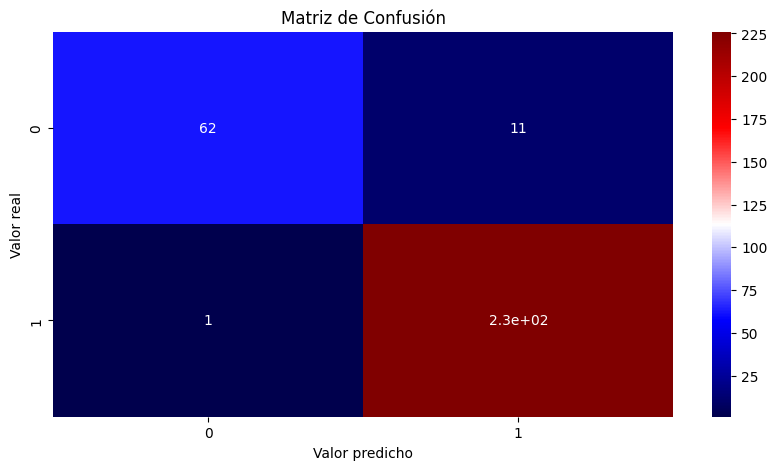

In [ ]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap='seismic')
plt.title("Matriz de Confusión")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.show()

# Evaluación del modelo



Para obtener una visión más completa y equilibrada del rendimiento del Modelo basado en Red Neuronal Convolucional (CNN) en la tarea de clasificación de imágenes para la detección de incendios forestales, utilizamos diversas métricas de evaluación. Estas métricas nos permiten evaluar diferentes aspectos del desempeño del modelo y asegurarnos de que su rendimiento sea robusto y fiable.

**Métricas de evaluación utilizadas**

**-**Accuracy (Precisión) = (TP+ TN) /(TP + TN + FP + FN)

**-**Precisión (precisión) =  TP /(TP + FP)

**-**Recall(Sensibilidad o Exhaustividad) =  TP  /(TP + FP)

**-**F1-Score = ([ 2 * (Precisión * Recall)  ]   / ( Precision + Recall)    

**-**AUC-ROC (Área bajo la curva ROC) = FP / (FP + TN)

TP (verdaderos positivos) = Números de casos positivos identificados por el modelo.

TN (verdaderos negativos) = Números de casos negativos identificados por el modelo.

FP (falsos positivos)=  Número de casos negativos incorrectamente identificados como positivos por el modelo.

FN (falsos negativos) = Números de casos positivos incorrectamente identificados como negativos por el modelo.

-AUC-ROC (Área bajo la curva ROC)

TPR =  Tasa de verdaderos positivos o Recall  
FPR = Tasa de Falsos positivos.

Los FPR son los  negativos reales que son incorrectamente clasificados como positivos.


In [ ]:
# Calcula las métricas Modelo CNN
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Red Neuronal Convolucional - Metrica_Accuracy: {accuracy:.2f}")
print(f"Red Neuronal Convolucional - Metrica_Precision: {precision:.2f}")
print(f"Red Neuronal Convolucional - Metrica_Recall: {recall:.2f}")
print(f"Red Neuronal Convolucional - Metrica_F1-Score: {f1:.2f}")
print(f"Red Neuronal Convolucional - Metrica_AUC-ROC: {roc_auc:.2f}")

Red Neuronal Convolucional - Metrica_Accuracy: 0.96
Red Neuronal Convolucional - Metrica_Precision: 0.95
Red Neuronal Convolucional - Metrica_Recall: 1.00
Red Neuronal Convolucional - Metrica_F1-Score: 0.97
Red Neuronal Convolucional - Metrica_AUC-ROC: 0.92


**Curva ROC para Modelo basado en Red Neuronal Convolucional (CNN)**

10/10 [==============================] - 28s 2s/step


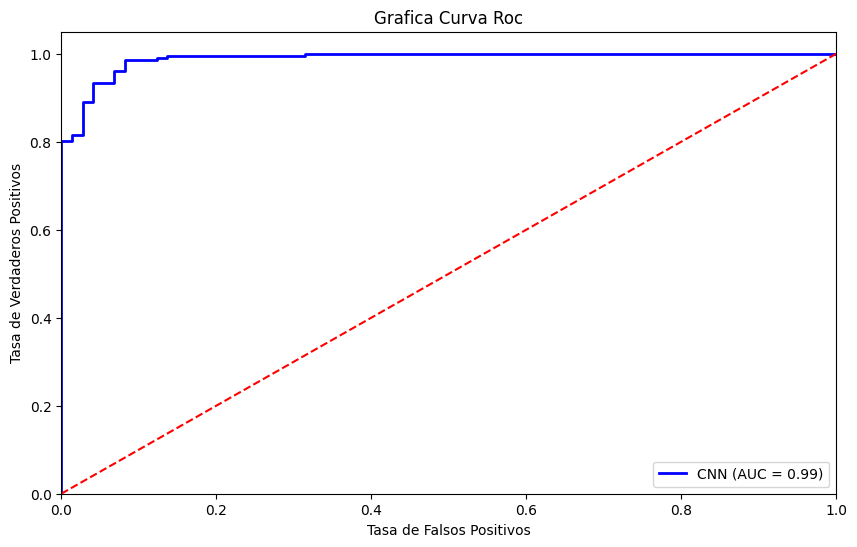

In [ ]:
#Curva ROC
# Calcular las puntuaciones de probabilidad
y_scores = model.predict(X_test).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

#Calcular el AU-ROC
roc_auc = roc_auc_score(y_test, y_scores)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'CNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Grafica Curva Roc')
plt.legend(loc="lower right")
plt.show()

**Modelo basado en Regresion Logistica**

In [ ]:
# Aplanar los datos de imagen
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Entrenar el modelo de Regresión Logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_flat, y_train)
y_pred_lr = model_lr.predict(X_test_flat)

# Calcular las métricas
accuracy_RegrecionLogistica = accuracy_score(y_test, y_pred_lr)
precision_RegrecionLogistica  = precision_score(y_test, y_pred_lr)
recall_RegrecionLogistica  = recall_score(y_test, y_pred_lr)
f1_RegrecionLogistica  = f1_score(y_test, y_pred_lr)
roc_auc_RegrecionLogistica  = roc_auc_score(y_test, y_pred_lr)

print(f"Regresion Logistica - Metrica_Accuracy: {accuracy_RegrecionLogistica:.2f}")
print(f"Regresion Logistica - Metrica_Precision: {precision_RegrecionLogistica:.2f}")
print(f"Regresion Logistica - Metrica_Recall: {recall_RegrecionLogistica:.2f}")
print(f"Regresion Logistica - Metrica_F1-Score: {f1_RegrecionLogistica:.2f}")
print(f"Regresion Logistica - Metrica_AUC-ROC: {roc_auc_RegrecionLogistica:.2f}")

Regresion Logistica - Metrica_Accuracy: 0.94
Regresion Logistica - Metrica_Precision: 0.95
Regresion Logistica - Metrica_Recall: 0.96
Regresion Logistica - Metrica_F1-Score: 0.96
Regresion Logistica - Metrica_AUC-ROC: 0.91


**Modelo Basado en Maquinas de Soporte Vectorial (SVM)**

In [ ]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_flat, y_train)
y_pred_svm = model_svm.predict(X_test_flat)

accuracy_MaquinaSoporteVectorial= accuracy_score(y_test, y_pred_svm)
precision_MaquinaSoporteVectorial = precision_score(y_test, y_pred_svm)
recall_MaquinaSoporteVectorial = recall_score(y_test, y_pred_svm)
f1_MaquinaSoporteVectorial = f1_score(y_test, y_pred_svm)
roc_auc_MaquinaSoporteVectorial = roc_auc_score(y_test, y_pred_svm)

#print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}, AUC-ROC: {roc_auc_svm}")

print(f"Maquina Soporte Vectorial - Metrica_Accuracy: {accuracy_MaquinaSoporteVectorial:.2f}")
print(f"Maquina Soporte Vectorial - Metrica_Precision: {precision_MaquinaSoporteVectorial:.2f}")
print(f"Maquina Soporte Vectorial - Metrica_Recall: {recall_MaquinaSoporteVectorial:.2f}")
print(f"Maquina Soporte Vectorial - Metrica_F1-Score: {f1_MaquinaSoporteVectorial:.2f}")
print(f"Maquina Soporte Vectorial - Metrica_AUC-ROC: {roc_auc_MaquinaSoporteVectorial:.2f}")


Maquina Soporte Vectorial - Metrica_Accuracy: 0.93
Maquina Soporte Vectorial - Metrica_Precision: 0.95
Maquina Soporte Vectorial - Metrica_Recall: 0.96
Maquina Soporte Vectorial - Metrica_F1-Score: 0.96
Maquina Soporte Vectorial - Metrica_AUC-ROC: 0.90


_____________________________________________

## Data Augmentation

## Generación de Data Augmentation

In [ ]:
# Importar librerías

#import shutil
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
# Crear un generador de datos de imagen con aumentaciones
data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Directorios de la clase "non fire"
carpeta_no_incendio = "/content/fire_dataset/non_fire_images"
carpeta_no_incendio_aumentadas = "/content/fire_dataset/non_fire_images_augmented"

# Crear el directorio para las imágenes aumentadas si no existe
if not os.path.exists(carpeta_no_incendio_aumentadas):
    os.makedirs(carpeta_no_incendio_aumentadas)

In [ ]:
# Número de imágenes a generar por imagen original
num_augmented_images = 5

# Generar imágenes aumentadas para cada imagen en la clase "non fire"
for filename in os.listdir(carpeta_no_incendio):
    img_path = os.path.join(carpeta_no_incendio, filename)
    img = load_img(img_path)  # Carga la imagen
    x = img_to_array(img)  # Convierte la imagen a un array numpy
    x = x.reshape((1,) + x.shape)  # Reshape para el generador

    # Genera imágenes aumentadas
    i = 0
    for batch in data_gen.flow(x, batch_size=1, save_to_dir= carpeta_no_incendio_aumentadas, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmented_images:
            break  # Genera solo un número fijo de imágenes por imagen original

In [ ]:
# Vericar número de muestras en clase non-fire

# Directorio que contiene las imágenes de paisajes sin incendios
data_dir_non_fire_augmented = "/content/fire_dataset/non_fire_images_augmented"

# Obtener la lista de nombres de archivo de las imágenes
image_files_non_fire_augmented = os.listdir(data_dir_non_fire_augmented)

# Total de imágenes etiquetadas sin incendios "not fire"
total_images_non_fire = len(non_fire_images)
print(f"Total de imágenes en el conjunto de datos 'no incendio': {total_images_non_fire}")

# Total de imágenes etiquetadas sin incendios "not fire augmented" aumentadas
total_images_non_fire_augmented = len(image_files_non_fire_augmented)
print(f"Total de imágenes en el conjunto de datos 'no incedio aumentadas': {total_images_non_fire_augmented}")


# Total de imágenes etiquetadas sin incendios
total = total_images_non_fire + total_images_non_fire_augmented
print(f"Total': {total}")

Total de imágenes en el conjunto de datos 'no incendio': 244
Total de imágenes en el conjunto de datos 'no incedio aumentadas': 1139
Total': 1383


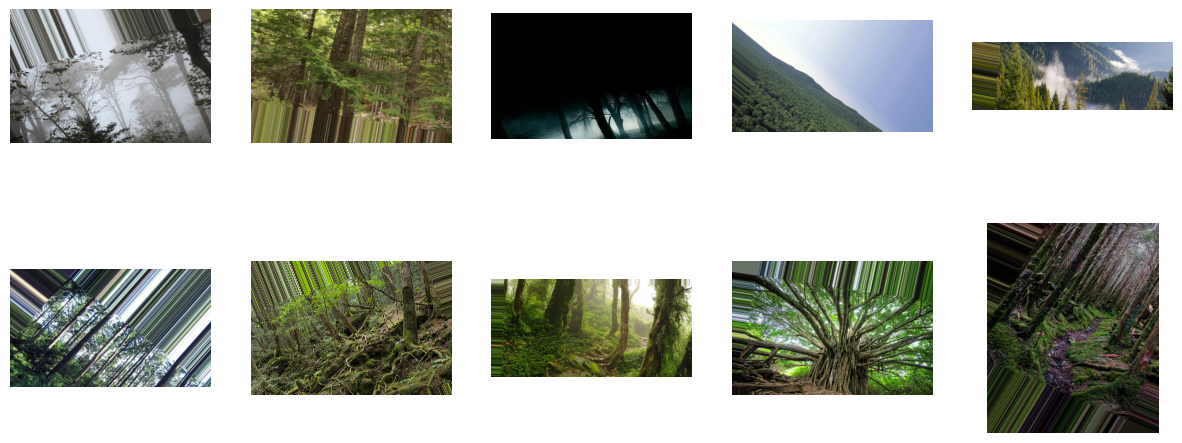

In [ ]:
# Visualizar algunas imágenes aumentadas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(os.path.join(data_dir_non_fire_augmented, image_files_non_fire_augmented[i]))
    if img is None:
        print(f"Error reading image: {image_files_non_fire_augmented[i]}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis('off')
plt.show()

### Etiquetado Data Augmentation

In [ ]:
# Crear etiquetas para las imágenes de incendios (1) y no-incendios (0)
labels_fire_a = [1] * len(fire_images)
labels_non_fire_a = [0] * len(non_fire_images + image_files_non_fire_augmented)

# Combinar las listas de archivos y las etiquetas
all_images_a = fire_images + non_fire_images
all_labels_a = labels_fire_a + labels_non_fire_a

In [ ]:
# Crear rutas completas para todas las imágenes
all_image_paths_a = [os.path.join(data_dir_fire, img) for img in fire_images] + [os.path.join(data_dir_non_fire, img) for img in non_fire_images] + [os.path.join(data_dir_non_fire_augmented, img) for img in image_files_non_fire_augmented]

# Crear un DataFrame de pandas
df_a = pd.DataFrame({
    'image_path': all_image_paths_a,
    'label': all_labels_a
})

# Mezclar el DataFrame para asegurarse de que no esté ordenado
df_a = shuffle(df_a).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame
print(df_a.head())

                                          image_path  label
0  /content/fire_dataset/non_fire_images_augmente...      0
1  /content/fire_dataset/non_fire_images_augmente...      0
2     /content/fire_dataset/fire_images/fire.219.png      1
3  /content/fire_dataset/non_fire_images_augmente...      0
4  /content/fire_dataset/non_fire_images_augmente...      0


## Procesamiento Data Augmentation

### Preprocesamiento de data augmentation

Cambio de espacio de color, redimensión de imágenes, normalización y cambio de Dataframe a arrays de Numpy

In [ ]:
#  Implementación de la función create_format_dataset()
Xa, ya = create_format_dataset(df_a)

Error: Error al leer la imagen: /content/fire_dataset/non_fire_images/non_fire.133.png
Error: Error al leer la imagen: /content/fire_dataset/non_fire_images/non_fire.189.png


In [ ]:
Xa.shape, ya.shape

((2136, 196, 196, 3), (2136,))

### Creamos sets de entrenamiento y evaluación para Data Augmentation

In [ ]:
# Divide el conjunto de datos en entrenamiento y prueba
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.3, stratify = ya)

In [ ]:
Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape

((1495, 196, 196, 3), (641, 196, 196, 3), (1495,), (641,))

## Modelado Data Augmentation

In [ ]:
# Crea el modelo de CNN
model_a = Sequential()

model_a.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model_a.add(Conv2D(64,(2,2),activation='relu'))
model_a.add(MaxPooling2D())
model_a.add(Conv2D(32,(2,2),activation='relu'))
model_a.add(MaxPooling2D())

model_a.add(Flatten())
model_a.add(Dense(128))
model_a.add(Dense(1,activation= "sigmoid"))

In [ ]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 195, 195, 128)     1664      
                                                                 
 conv2d_4 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 97, 97, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 73728)            

### Entrenamiento del modelo de Data Augmentation

In [ ]:
# Define la función de pérdida y el optimizador
callbacks_a = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
]

In [ ]:
# Compila el modelo
model_a.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenamiento del modelo
model_a.fit(
    Xa_train,
    ya_train,
    validation_data=(Xa_test, ya_test),
    epochs=6,
    batch_size=32,
    callbacks=callbacks_a
)

Epoch 1/6
47/47 [==============================] - 517s 11s/step - loss: 0.6295 - accuracy: 0.8595 - val_loss: 0.2049 - val_accuracy: 0.9173
Epoch 2/6
47/47 [==============================] - 512s 11s/step - loss: 0.1350 - accuracy: 0.9485 - val_loss: 0.1883 - val_accuracy: 0.9501
Epoch 3/6
47/47 [==============================] - 510s 11s/step - loss: 0.1468 - accuracy: 0.9472 - val_loss: 0.1893 - val_accuracy: 0.9173
Epoch 4/6
47/47 [==============================] - 510s 11s/step - loss: 0.0904 - accuracy: 0.9652 - val_loss: 0.1589 - val_accuracy: 0.9548
Epoch 5/6
47/47 [==============================] - 510s 11s/step - loss: 0.0681 - accuracy: 0.9773 - val_loss: 0.1872 - val_accuracy: 0.9392
Epoch 6/6
47/47 [==============================] - 508s 11s/step - loss: 0.0558 - accuracy: 0.9773 - val_loss: 0.1841 - val_accuracy: 0.9345


In [ ]:
# Evaluación del modelo
ya_pred = model_a.predict(Xa_test)

21/21 [==============================] - 51s 2s/step


In [ ]:
# Convierte las predicciones en etiquetas
ya_pred = ya_pred.reshape(-1)
ya_pred[ya_pred<0.5] = 0
ya_pred[ya_pred>=0.5] = 1
ya_pred = ya_pred.astype('int')

In [ ]:
ya_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

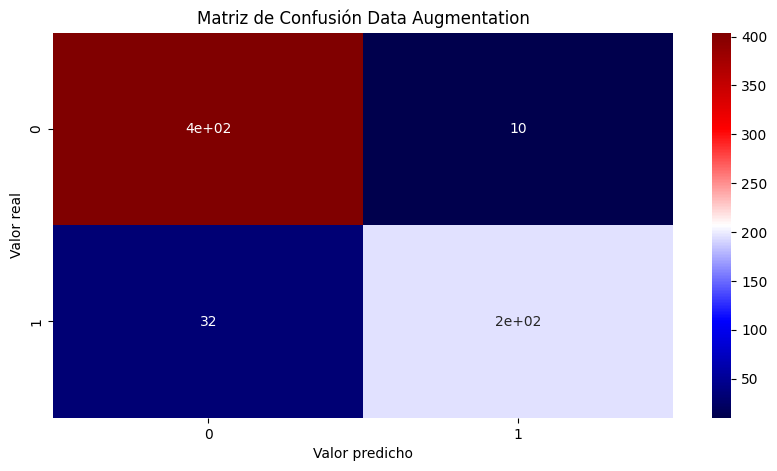

In [ ]:
# Calcula la matriz de confusión
cm_a = confusion_matrix(ya_test, ya_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(cm_a, annot=True, cmap='seismic')
plt.title("Matriz de Confusión Data Augmentation")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.show()

_____________________________________________



# Guardar y descargar el modelo

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

# Si guarda el modelo en formato HDF5
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Movil

In [ ]:
# Cargar el modelo Keras
model = tf.keras.models.load_model('model.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TFLite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)